Updated BIKE SHARING DATASET Analysis
By Revati Pawar

#About Data Set:
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 



#Dataset characteristics:
  - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	




#Associated tasks:

#- Performing EDA ( Exploratory Data Analysis )

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
#import pandas as pd
df_bike=pd.read_csv('/content/bike.csv')

In [4]:
df_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
df_bike.shape

(730, 16)

In [6]:
#The info() method prints information about the DataFrame. 
#The information contains the number of columns, column labels, column data types, memory usage, range index, 
#and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Checking Missing values
df_bike.isnull().T


,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
instant,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dteday,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
season,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
mnth,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
holiday,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weekday,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
workingday,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weathersit,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
temp,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#calculating count of missing values present in each feature/column
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Checking whether duplicate values are present in the dataset or not
df_bike.duplicated().sum()

0

In [10]:
#To get a descriptive statistics summary of a given dataframe
df_bike.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


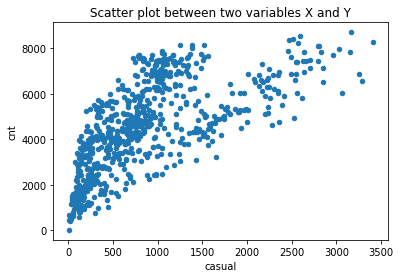

In [11]:
#Ploting Scatter Plot
import matplotlib.pyplot as plot
df_bike.plot.scatter(x='casual', y='cnt', title= "Scatter plot between two variables X and Y");
plot.show(block=True);

In [12]:
#creating copy of dataset for further computations

In [13]:
dum_bike=df_bike

In [14]:
dum_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [15]:
dum_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
#Cheking datatypes of each feature
dum_bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [17]:
#Checking count of uique values present in the dataset
dum_bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [18]:
#Checking correaltion between the different attributes in the dataset 
dum_bike.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


In [19]:
#Renaming the columns for better understading and to avoid confusions

dum_bike = dum_bike.rename(columns = {'yr': 'Year', 'mnth': 'Month','hum': 'Humidity','cnt':'Count'}, inplace = False)
dum_bike.columns

Index(['instant', 'dteday', 'season', 'Year', 'Month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'Humidity', 'windspeed',
       'casual', 'registered', 'Count'],
      dtype='object')

In [20]:
#Droping unnecessary columns
dum_bike.drop(['instant','dteday'],axis='columns', inplace=True)

In [21]:
dum_bike.drop(['atemp'],axis='columns', inplace=True)

In [22]:
#After droping column instent, date, atemp
dum_bike.corr()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,Humidity,windspeed,casual,registered,Count
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.208220,-0.229607,0.208737,0.410310,0.404584
Year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,-0.112547,-0.011624,0.250502,0.596911,0.569728
Month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.542731,0.539436,0.627044
Humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.167995,-0.217914,-0.235132


Text(0.5, 1.0, 'Heatmap of the Bike Sharing Dataset')

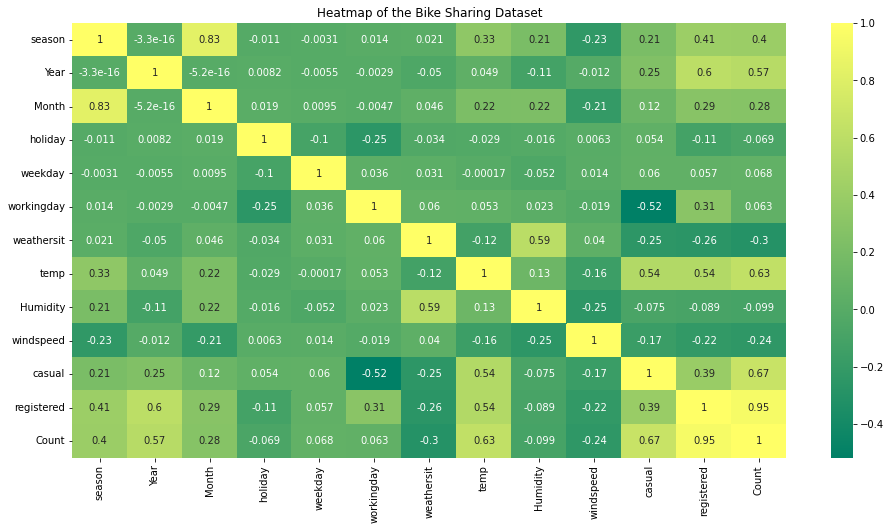

In [23]:
#Ploting Heatmap for correlation

plt.figure(figsize=(16,8))
sns.heatmap(dum_bike.corr(),annot=True,cmap='summer')
plt.title("Heatmap of the Bike Sharing Dataset")

As we can see in the above heatmap there is highly positive correlation between 'registered' and 'count' feature, which is 0.95.
Also between  'Month' and 'Season' there is highly positive correlation which is 0.83.

And between 'casula' and 'workingday' feature there is highly negative correlation, which is -0.52.


In [24]:
dum_bike.columns

Index(['season', 'Year', 'Month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'Humidity', 'windspeed', 'casual', 'registered',
       'Count'],
      dtype='object')

In [25]:
#Seasons wise count
dum_bike['season'].value_counts(ascending=True)

#season : season (1:springer, 2:summer, 3:fall, 4:winter)

4    178
1    180
2    184
3    188
Name: season, dtype: int64

In [26]:
dum_bike.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
Year,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
Month,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
Humidity,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021


In [27]:
# Which season that has more bikes count

dum_bike.groupby("season").describe()[["Count"]]

#season : season (1:springer, 2:summer, 3:fall, 4:winter)

Count                                                             \
        count         mean          std     min     25%     50%      75%   
season                                                                     
1       180.0  2608.411111  1402.659942   431.0  1536.0  2222.5  3463.75   
2       184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
3       188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
4       178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

                
           max  
season          
1       7836.0  
2       8362.0  
3       8714.0  
4       8555.0

#weathersit
       - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [28]:
# Which weather that has more bikes count

dum_bike.groupby("weathersit").describe()["Count"]

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.50,8714.0
2,246.0,4044.813008,1807.309708,605.0,2699.0,4043.0,5258.75,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.00,4639.0


As we can see from above maximum count of bike rental is in  Clear, Few clouds, Partly cloudy, Partly cloudy weathersit 

In [29]:
dum_bike['weathersit'].unique()

array([2, 1, 3])

- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

In [30]:
# Rent during Workingdays
dum_bike.groupby("workingday").describe()["Count"]

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.5,4459.0,5907.5,8714.0
1,499.0,4590.332665,1876.247607,22.0,3362.0,4585.0,5989.0,8362.0


So,here we can see maximum count of bike rental is on working days.

In [31]:
# Rent during holiday
dum_bike.groupby("holiday").describe()[["Count"]]

Count                                                                
         count        mean         std     min     25%     50%     75%     max
holiday                                                                       
0        709.0  4530.90268  1927.71680    22.0  3214.0  4563.0  5936.0  8714.0
1         21.0  3735.00000  2103.35066  1000.0  1951.0  3351.0  6034.0  7403.0

As we can see on holidays there is less number of bike rental count.

In [32]:
# Correlation between bikes count and all features
dum_bike.corr(method = 'pearson') # Correlation between -1 0 1
dum_bike.corr()[["Count"]]

,Count
season,0.404584
Year,0.569728
Month,0.278191
holiday,-0.068764
weekday,0.067534
workingday,0.062542
weathersit,-0.295929
temp,0.627044
Humidity,-0.098543
windspeed,-0.235132


From above computation we can see that there is highly positive correlation between count and registerd feature

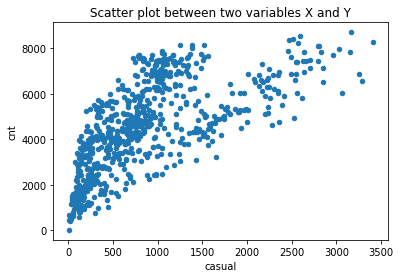

In [33]:
#Scatter plot of orignal dataset
df_bike.plot.scatter(x='casual', y='cnt', title= "Scatter plot between two variables X and Y");
plot.show(block=True);

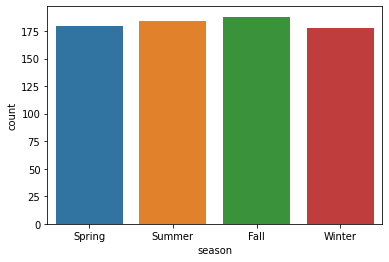

In [34]:
#Ploting Barplot for season feature

#season : season (1:springer, 2:summer, 3:fall, 4:winter)
ax=sns.countplot(data = dum_bike , x = 'season')

plt.xticks(np.arange(4),['Spring','Summer','Fall','Winter'])
#for p in ax.patches:
#        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
#ax.legend(loc='upper center', title='Season')
plt.show()

So we can see in the above bar plot or graph there are four different seasons Spring, Summer, Fall and Winter. And Season Fall has heighst bike sharing count  whereas Spring has lowest bike sharing count.

#Data Cleaning :

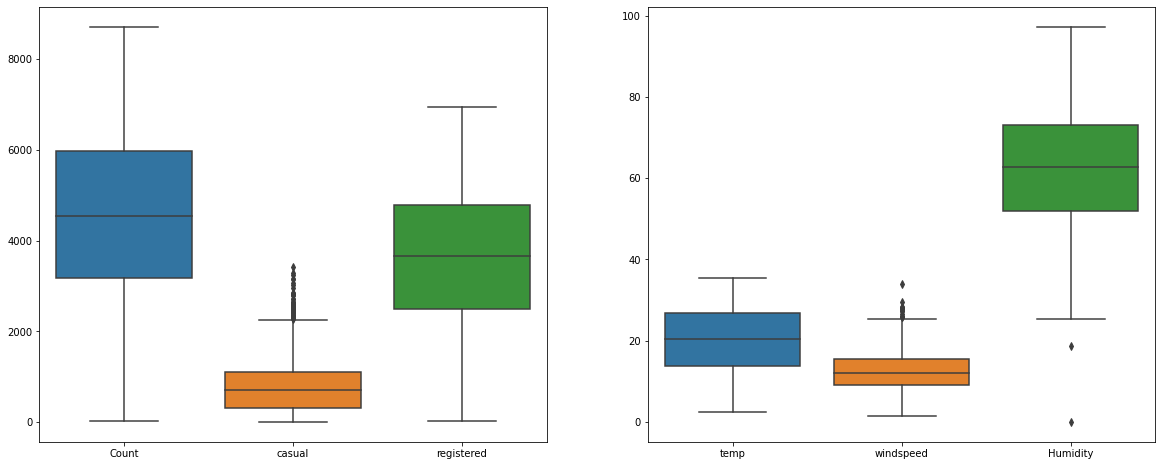

In [35]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,8))
sns.boxplot(data=dum_bike[['Count','casual','registered']],ax=ax1)
sns.boxplot(data=dum_bike[['temp','windspeed','Humidity']],ax=ax2)

In above plots, the casual, windspeed, & humidity data shows the outliers.

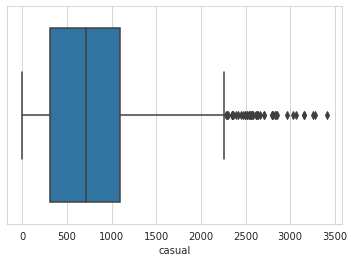

In [36]:
#Ploting boxplot for checking the outliers in the dataset

sns.set_style("whitegrid")
sns.boxplot(x = 'casual', data = dum_bike)

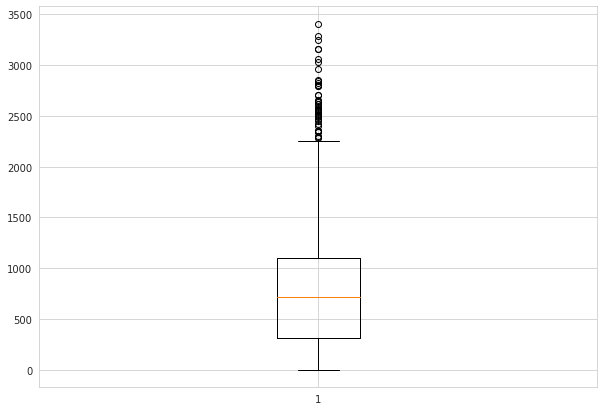

In [37]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(dum_bike['casual'])
 
# show plot
plt.show()

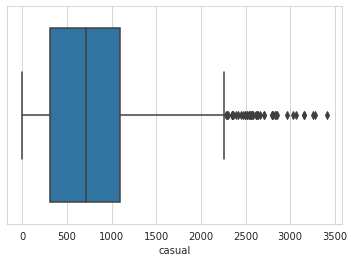

In [38]:
sns.set_style("whitegrid")
sns.boxplot(x = 'casual', data = dum_bike)

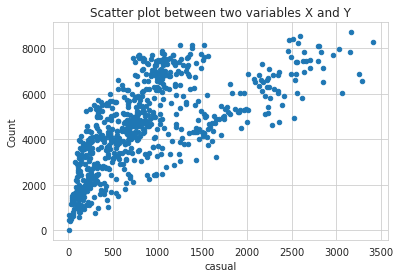

In [39]:
#Scatterplot before removing outliers
dum_bike.plot.scatter(x='casual', y='Count', title= "Scatter plot between two variables X and Y");
plot.show(block=True);

In [40]:
outliers3=np.where(dum_bike['casual']>2000)
outliers3

(array([140, 147, 148, 182, 183, 184, 196, 197, 246, 280, 281, 440, 441,
        446, 454, 455, 461, 462, 468, 469, 475, 483, 489, 490, 496, 497,
        503, 504, 510, 511, 512, 517, 518, 524, 525, 531, 532, 538, 539,
        549, 559, 567, 573, 574, 580, 587, 588, 594, 608, 609, 616, 622,
        623, 629, 630, 636, 637, 643, 650, 651, 657, 658, 664, 678, 679]),)

In [41]:
dum_bike.drop(outliers3[0],inplace=True)

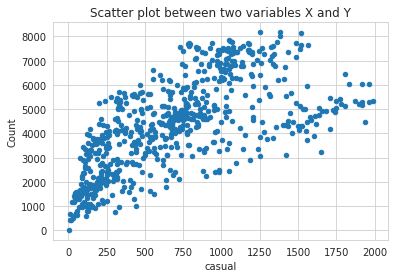

In [42]:
#Scatterplot after removing outliers

dum_bike.plot.scatter(x='casual', y='Count', title= "Scatter plot between two variables X and Y");
plot.show(block=True);

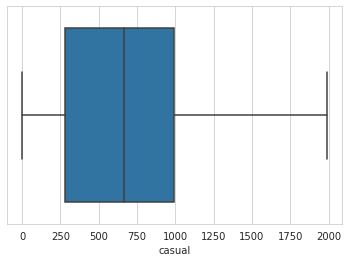

In [43]:
#After removing outlier from the casual feature ploting boxplot 

sns.set_style("whitegrid")
sns.boxplot(x = 'casual', data = dum_bike)

#Data Visualization :

[Text(0.5, 1.0, 'Month-wise raidership distribution')]

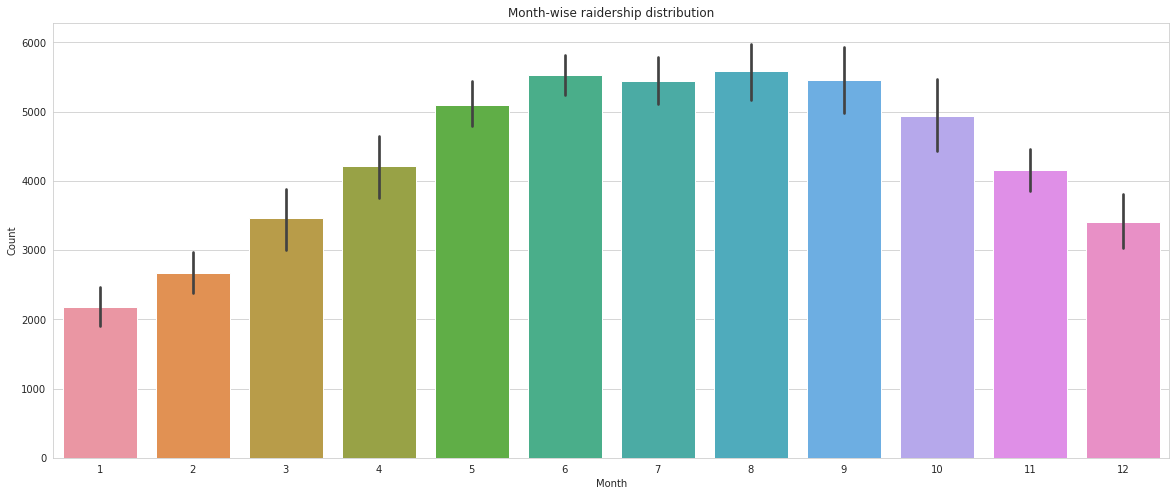

In [44]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dum_bike[['Month','Count']],x='Month',y='Count',ax=ax)
ax.set(title='Month-wise raidership distribution')

The above distribution shows highest raidership counts for the month June-September & lowest count for January month.

Our dataset contains year values 0 for representing 2011 and 2 for representing 2012.

[Text(0.5, 1.0, 'Year-wise distribution of raidership counts')]

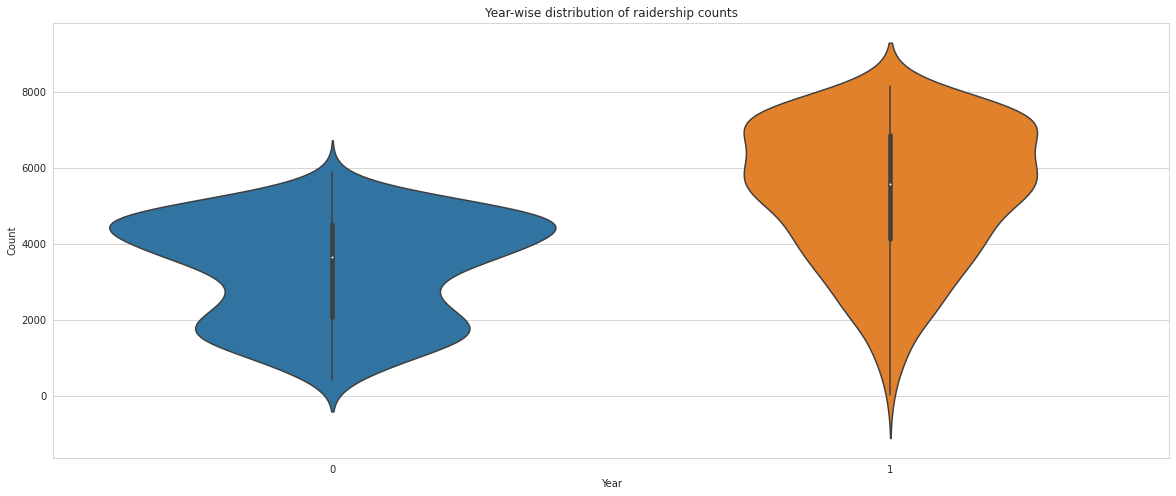

In [45]:
# Violin plot is used for Year-wise distribution
fig,ax=plt.subplots(figsize=(20,8))
sns.violinplot(data=dum_bike[['Year','Count']],x='Year',y='Count',ax=ax)
ax.set(title='Year-wise distribution of raidership counts')

In above distribution,

year 0 - 2011 , year 1 - 2012

The above distribution clearly helps us to understand the multimodal distribution in both 2011 and 2012 raidership counts.The distribution for 2012 has peaks at highest values as compared with the distribution for 2011.

[Text(0.5, 1.0, 'Count of bikes during different days')]

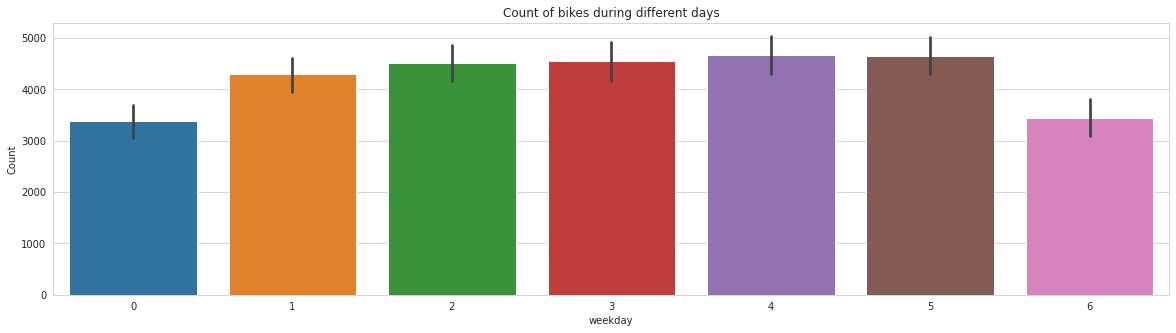

In [46]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=dum_bike, x='weekday', y='Count', ax=ax)
ax.set(title='Count of bikes during different days')

From above plot we can say that on weekends there is less bike rental count as compare to weekdays.

[Text(0.5, 1.0, 'Relation between humidity and users')]

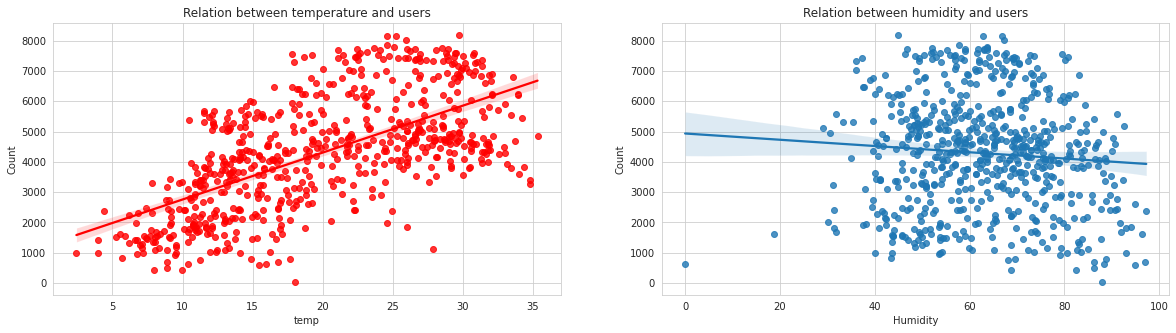

In [47]:
#Ploting relation between humidity and users
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=dum_bike['temp'], y=dum_bike['Count'], ax=ax1 ,color='red')
ax1.set(title="Relation between temperature and users")
sns.regplot(x=dum_bike['Humidity'], y=dum_bike['Count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

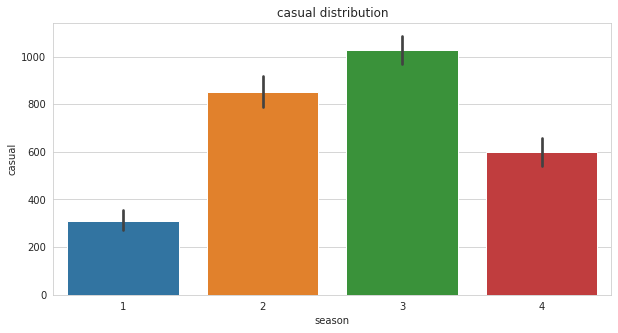

In [48]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='season',y='casual',data=dum_bike,ax=ax)
ax.set_title('casual distribution')
plt.show()

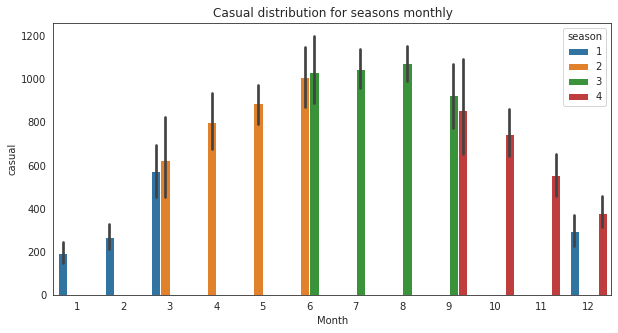

In [49]:
#Casual distribution for seasons monthly
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='Month',y='casual',data=dum_bike,hue='season',ax=ax)
ax.set_title('Casual distribution for seasons monthly')
plt.show()

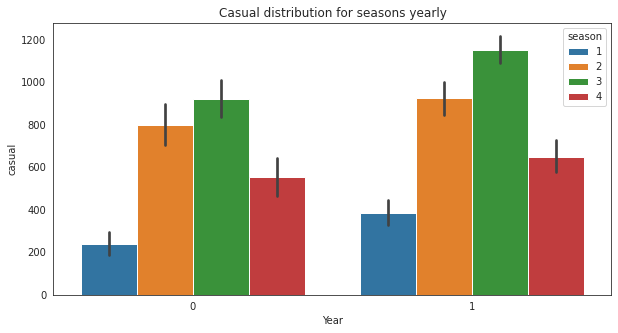

In [50]:
#Casual distribution for seasons yearly
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='Year',y='casual',data=dum_bike,hue='season',ax=ax)
ax.set_title('Casual distribution for seasons yearly')
plt.show()

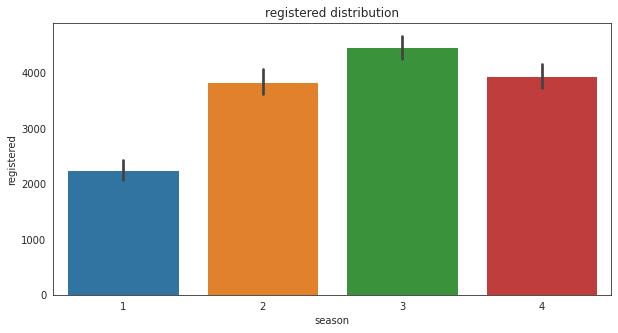

In [51]:
#Registered distribution for seasons
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='season',y='registered',data=dum_bike,ax=ax)
ax.set_title('registered distribution')
plt.show()

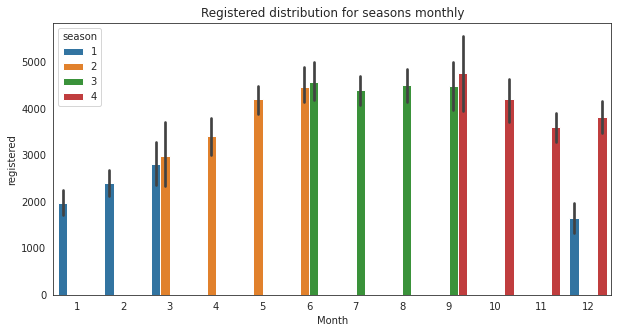

In [52]:
#Registered distribution for seasons monthly
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='Month',y='registered', data=dum_bike, hue='season',ax=ax)
ax.set_title('Registered distribution for seasons monthly')
plt.show()

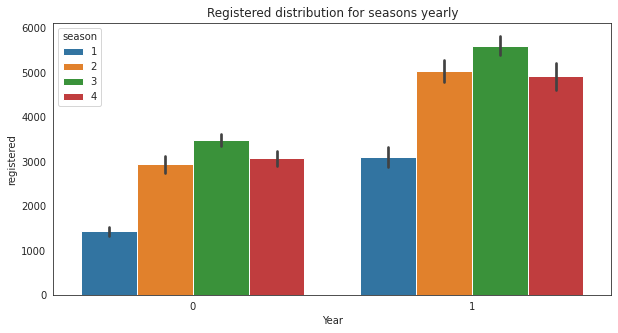

In [53]:
#Registered distribution for seasons yearly
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='Year',y='registered', data=dum_bike, hue='season', ax=ax)
ax.set_title('Registered distribution for seasons yearly')
plt.show()

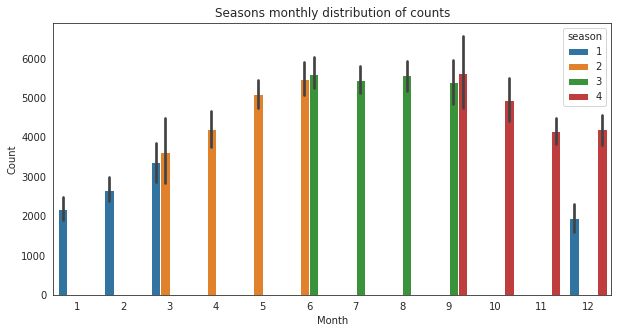

In [54]:
#Seasons monthly distribution of counts
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='Month',y='Count',data=dum_bike,hue='season',ax=ax)
ax.set_title('Seasons monthly distribution of counts')
plt.show()

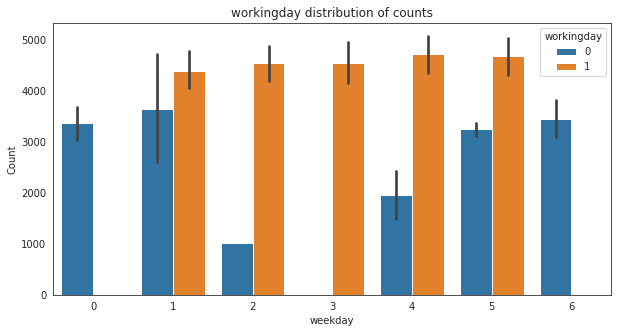

In [55]:
# Workingday distribution of counts
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='weekday',y='Count',data=dum_bike,hue='workingday',ax=ax)
ax.set_title('workingday distribution of counts')
plt.show()

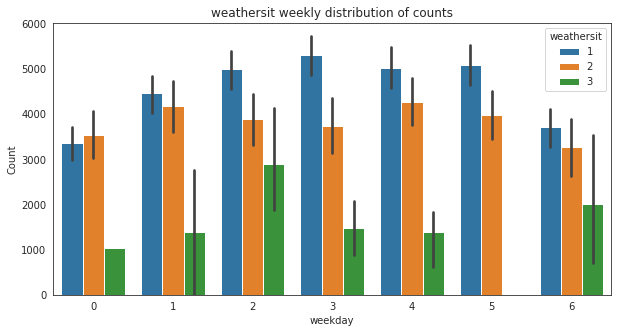

In [56]:
#Weathersit weekly distribution of counts
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='weekday',y='Count',data=dum_bike,hue='weathersit',ax=ax)
ax.set_title('weathersit weekly distribution of counts')
plt.show()

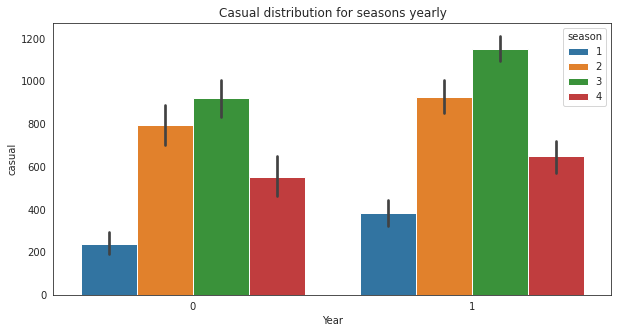

In [57]:
#Casual distribution for seasons yearly
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='Year',y='casual',data=dum_bike,hue='season',ax=ax)
ax.set_title('Casual distribution for seasons yearly')
plt.show()

#Conclusion:
After performing EDA on bike sharing dataset I observed that how different characters affecting on rental count of bike sharing. 
Like on weekends there is less count as compare to weekdays/workingdays. Day wise I can say that on Saturdays and Sundays there is less bike rental count, whereas on Monday to Friday more bike rental count. Similarly Registered users are more as compare to casual users. And I also checked that how seasons are affecting on bike rental count, then I checked is the temperature and humiditiy affecting on bike rental count.